<center>
    
# **Titanic Data Visualization**

<center>

In [1]:
# import the important libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# import the plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read the dataset
titanic = pd.read_csv('titanic.csv')

In [3]:
# viewing the first 5 rows of data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# viewing the info of the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## The Passengers on the Titanic (Age, Gender, Class, etc.)

D:\Applications\Anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 0.98, 'Each Passenger Class Given Sex')

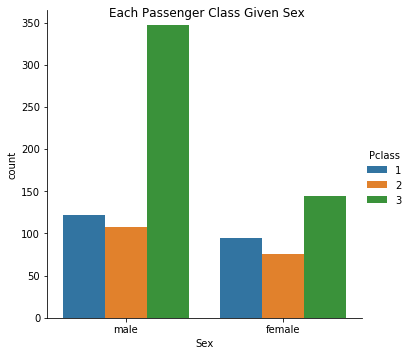

In [5]:
# visualizing bar chart of each passenger class given sex
sns.factorplot('Sex', 
               data = titanic, 
               hue = 'Pclass', 
               kind = 'count').fig.suptitle("Each Passenger Class Given Sex")

Text(0.5, 0.98, 'Each Sex Given Passenger Class')

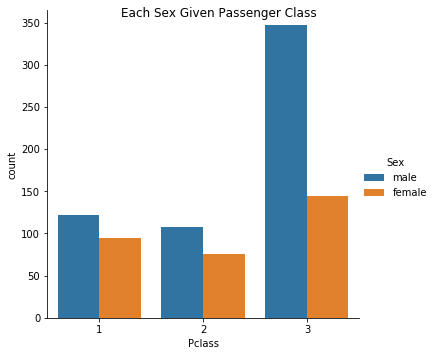

In [6]:
# visualizing bar chart of each sex given each passenger class
sns.factorplot('Pclass', 
               data = titanic, 
               hue = 'Sex', 
               kind = 'count').fig.suptitle("Each Sex Given Passenger Class")

In [7]:
# to separate men, women, and children
def male_female_child(passenger):
    age, sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [8]:
# apply the function to the table
titanic['Person'] = titanic[['Age', 'Sex']].apply(male_female_child, axis = 1)

In [9]:
# viewing the first 10 rows
titanic[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


Text(0.5, 0.98, 'Each Category of Person Given Passenger Class')

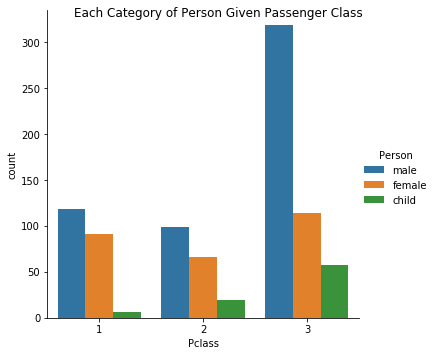

In [10]:
# visualizing male, women and children given passenger class
sns.factorplot('Pclass', 
               data = titanic, 
               hue = 'Person', 
               kind = 'count').fig.suptitle("Each Category of Person Given Passenger Class")

Text(0.5, 1.0, 'Age Distribution')

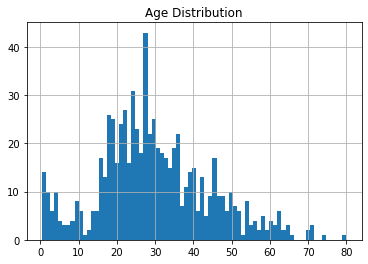

In [11]:
# visualizing age through histogram
titanic['Age'].hist(bins = 75)
plt.title("Age Distribution")

In [12]:
# mean of age
titanic['Age'].mean()

29.69911764705882

In [13]:
# count amount of people from each person category
titanic['Person'].value_counts()

male      537
female    271
child      83
Name: Person, dtype: int64

Text(0.5, 1, 'Kernel Density Estimate of Both Sexes')

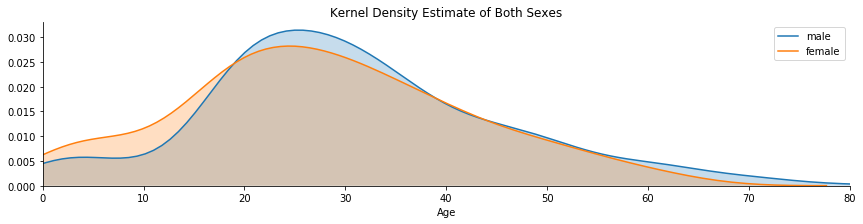

In [14]:
# visualizing kdeplot for sex side by side
fig = sns.FacetGrid(titanic,hue = 'Sex', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of Both Sexes")

Text(0.5, 1, 'Kernel Density Estimate of All Categories of Person')

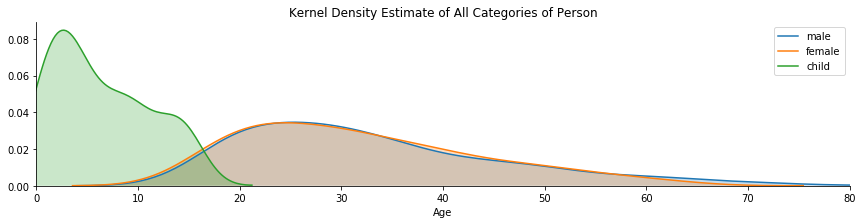

In [15]:
# visualizing kdeplot for person side by side
fig = sns.FacetGrid(titanic,hue = 'Person', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of All Categories of Person")

Text(0.5, 1, 'Kernel Density Estimate of All Passenger Classes')

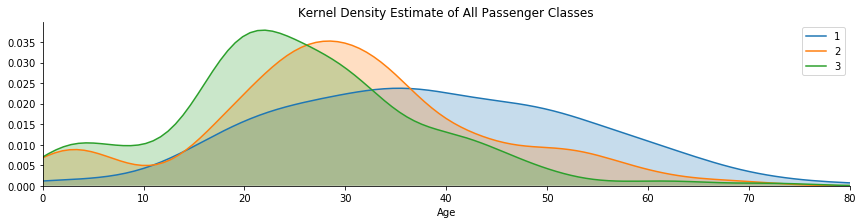

In [16]:
# visualizing kdeplot for passenger class side by side
fig = sns.FacetGrid(titanic,hue = 'Pclass', aspect = 4)
fig.map(sns.kdeplot, 'Age', shade = True)

# x is limited from 0 to oldest age
oldest = titanic['Age'].max()
fig.set(xlim = (0, oldest))

# give the legend to the plot
plt.legend()
plt.title("Kernel Density Estimate of All Passenger Classes")

<div style="text-align: justify"> 
The passengers can be divided based on their sex, age, and passenger. Firstly, there are more males than females on board in all three passenger classes. Then, adults and children are separated based on their age. If one's age is below 16 years old, he/she will be considered "child".
<br>
<br>
After transforming the data, the new data is stored in a new column called "Person" and the column is plotted. The new plot indicates that there are still more males (537 people) than females (271 people), however this time, there are significant amount of children (83 people) in all three passenger classes. 
<br>
<br>
Meanwhile, age is visualized using a histogram and it can be seen that there are a lot of people ranging from 20 years old to 40 years old. This applies to each sex and each category of person.
</div>

## Passengers' Deck and The Relations with the Class

In [17]:
# to view the first 5 rows of the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [18]:
# drop NaN value from cabin column and input it into deck object
deck = titanic[['Cabin','Pclass']].dropna()

In [19]:
# preview of the deck object
deck.head()

,Cabin,Pclass
1,C85,1
3,C123,1
6,E46,1
10,G6,3
11,C103,1


Text(0.5, 1, 'Amount of Passengers in Each Deck')

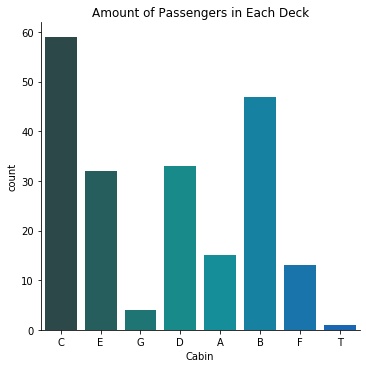

In [20]:
# to get the first letter of the cabin indicating the deck and append it to levels list
levels = []

for level in deck['Cabin']:
    levels.append(level[0])
    
# plot of the levels list
cabin = DataFrame(levels)
cabin.columns = ['Cabin']
sns.factorplot('Cabin', data = cabin, palette = 'winter_d', kind = 'count')
plt.title("Amount of Passengers in Each Deck")

Text(0.5, 1, 'Amount of Passengers in Each Deck Without Deck T')

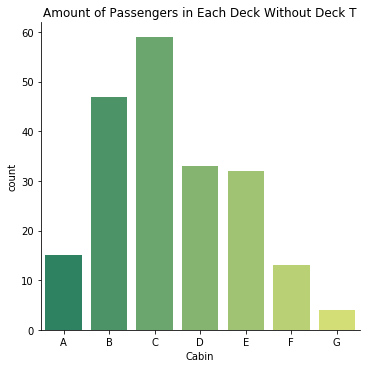

In [21]:
# redefine cabin dataframe and visualize it without deck T
cabin = cabin[cabin.Cabin != 'T']

sns.factorplot('Cabin', data = cabin, palette = 'summer', order = ['A','B','C','D','E','F','G'], kind = 'count')
plt.title("Amount of Passengers in Each Deck Without Deck T")

<div style= "text-align: justify">
All the rows which have null value in the cabin column have to be omitted and saved in deck object. The deck can be derived from cabin column as the deck is the first character of the cabin code. There are a lot of people in deck B, C, D, and E indicating they are the lower class passengers. Meanwhile, the rest of the decks are boarded by middle and high class passengers.
</div>

## Where the Passengers Came from

Text(0.5, 1, 'Cities of Embarkation')

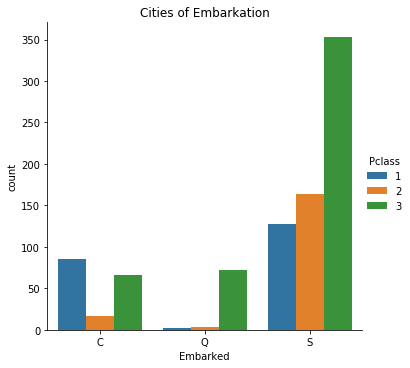

In [22]:
# to know where the passengers come from
sns.factorplot('Embarked', 
               data = titanic, 
               hue = 'Pclass', 
               kind = 'count', 
               order = ['C','Q','S'])
plt.title("Cities of Embarkation")

<div style = "text-align: justify">
Based on the graph, majority of passengers are from Southhampton (S) followed by Cherbourg(C) and then, Queenstown (Q). In Queenstown, both high and middle class passengers are rare while, in Cherbourg only the middle class passengers are rare.
</div>

## Those Who Were Alone and Those with Family

In [23]:
# to view the first 5 rows of the data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [24]:
# summing up the sibling and parent-child value
titanic['Alone'] = titanic.SibSp + titanic.Parch

In [25]:
# viewing the result
titanic['Alone']

0       1
1       1
2       0
3       1
4       0
5       0
6       0
7       4
8       2
9       1
10      2
11      0
12      0
13      6
14      0
15      0
16      5
17      0
18      1
19      0
20      0
21      0
22      0
23      0
24      4
25      6
26      0
27      5
28      0
29      0
       ..
861     1
862     0
863    10
864     0
865     0
866     1
867     0
868     0
869     2
870     0
871     2
872     0
873     0
874     1
875     0
876     0
877     0
878     0
879     1
880     1
881     0
882     0
883     0
884     0
885     5
886     0
887     0
888     3
889     0
890     0
Name: Alone, Length: 891, dtype: int64

In [26]:
# create a new column indicating whether the passenger was travelling alone or 
# with family
titanic['Alone'].loc[titanic['Alone'] > 0] = "With Family"
titanic['Alone'].loc[titanic['Alone'] == 0] = "Alone"

D:\Applications\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [27]:
# view the first 5 columns of the new data
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


Text(0.5, 1, 'With Family vs Alone')

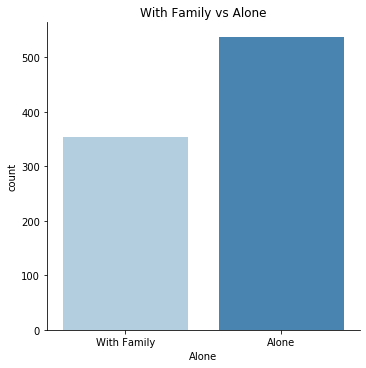

In [28]:
# plot the alone column
sns.factorplot('Alone', data = titanic, palette = "Blues", kind = 'count')
plt.title("With Family vs Alone")

<div style = "text-align: justify">
Firstly, a new column called "Alone" has to be established differentiating those who board alone and with family. Those who board with family can be either with their siblings (SibSp) or parents/children (Parch). If a data of one passenger has zero value in both SibSp and Parch, the passenger travels alone. So, the value in the Alone column is written "Alone". Otherwise, it is to be written "With Family". From the graph, it can be concluded that there are more people who travel alone than those with family.
</div>

## Factors Which Helped Someone Survive the Sinking or Crash of the Titanic

Text(0.5, 1, 'Survivor')

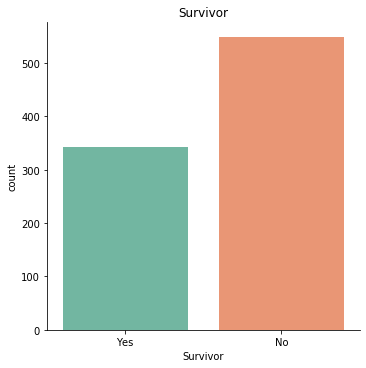

In [29]:
# mapping the survivor
titanic['Survivor'] = titanic.Survived.map({0:'No', 
                                            1:"Yes"})
sns.factorplot('Survivor', 
               data = titanic, 
               palette = 'Set2', 
               order = ['Yes', 'No'], 
               kind = 'count')
plt.title("Survivor")

Text(0.5, 1, 'Survivability Based on Passenger Class and Person Category')

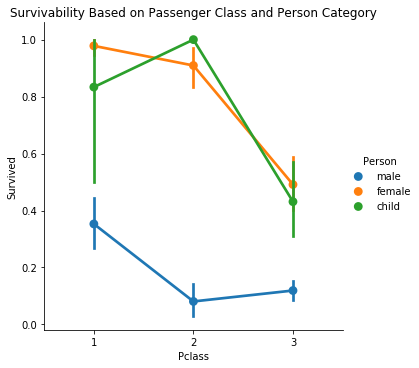

In [30]:
# assessing survivability based on passenger class and person
sns.factorplot('Pclass', 'Survived', hue = 'Person', data = titanic)
plt.title("Survivability Based on Passenger Class and Person Category")

Text(0.5, 1, 'Survivability Based on Age')

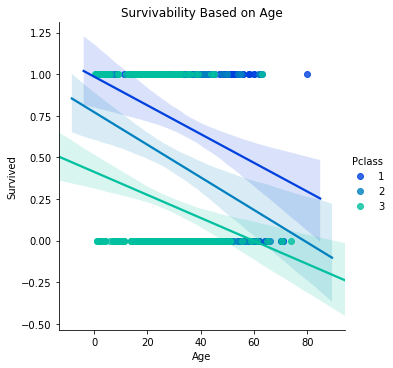

In [31]:
# finding out if age affects survivability
sns.lmplot(x = 'Age', 
           y = 'Survived', 
           data = titanic, 
           hue = 'Pclass', 
           palette= 'winter')
plt.title("Survivability Based on Age")

Text(0.5, 1, 'Survivability Based on Passengers Class\nSegmented by Generations')

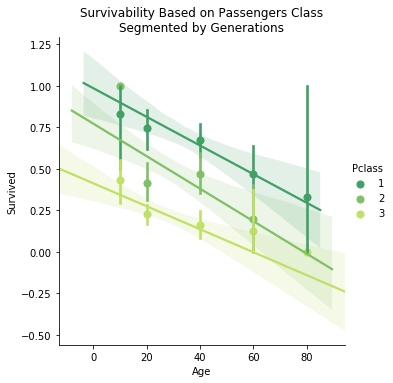

In [32]:
# differentiating gap in x based on generations
generations = [10, 20, 40, 60, 80]

sns.lmplot(x = 'Age', 
           y = 'Survived', 
           data = titanic, 
           hue = 'Pclass', 
           palette= 'summer',
           x_bins = generations)
plt.title("Survivability Based on Passengers Class\nSegmented by Generations")

Text(0.5, 1, 'Survivability Based on Sex Segmented by Generations')

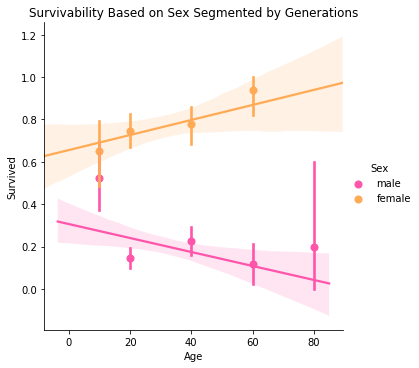

In [33]:
# finding out if age given sex affects survivability
sns.lmplot(x = 'Age', 
           y = 'Survived', 
           data = titanic, 
           hue = 'Sex', 
           palette= 'spring',
           x_bins = generations)
plt.title("Survivability Based on Sex Segmented by Generations")

<div style = "text-align: justify">
From the tragedy, there are people who survived and there are those who did not. The survivability was slim as they were not prepared for the sinking of Titanic. Based on the data, those who survived are marked with value 1 and those who did not are marked with value 0. At that time, they prioritized women and children, so that their survivabilities are quite high. On the other hand, men have low survivability as a result of limited amount of lifeboats on board. Aside from women and children, they also prioritized the high class and middle class passengers resulting in the majority of women and children from high class and middle class survived the tragedy. In addition, those who are older than 40 years old are more unlikely to survive. 
</div>